In [1]:
import numpy as np
from dbn import DeepBeliefNet
from util import read_mnist

image_size = [28, 28]
train_imgs, train_lbls, test_imgs, test_lbls = read_mnist(
        dim=image_size, n_train=60000, n_test=10000
    )

dbn = DeepBeliefNet(
        sizes={
            "vis": image_size[0] * image_size[1],
            "hid": 500,
            "pen": 500,
            "top": 2000,
            "lbl": 10,
        },
        image_size=image_size,
        n_labels=10,
        batch_size=60000,
    )


dbn.train_greedylayerwise(
        vis_trainset=train_imgs, lbl_trainset=train_lbls, n_iterations=1000
)

data = train_imgs

for name, rbm in dbn.rbm_stack.items():
    if rbm.is_top:
        data = np.concatenate((data, train_lbls), axis=1)
        _, h = rbm.get_h_given_v(data)
        _, reconstruction = rbm.get_v_given_h(h)
    else:
        _, h = rbm.get_h_given_v_dir(data)
        _, reconstruction = rbm.get_v_given_h_dir(h)
    
    loss = rbm.compute_reconstruction_loss(data, reconstruction) / data.shape[0]

    print(f"RBM: {name}, Reconstruction error: {loss}")

    data = h

loaded rbm[vis--hid] from ./trained_rbm
loaded rbm[hid--pen] from ./trained_rbm
loaded rbm[pen+lbl--top] from ./trained_rbm
RBM: vis--hid, Reconstruction error: 0.023370076460249082
RBM: hid--pen, Reconstruction error: 0.012921902164757151
RBM: pen+lbl--top, Reconstruction error: 0.01772491968325323


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme('notebook', 'whitegrid')

def plot_acc(dbn: DeepBeliefNet, lbls: np.ndarray, train: bool = True):
    history = np.array(dbn.history["label_convergence"])
    labels = np.argmax(lbls, axis=1)

    evolution = np.mean(1*(history == labels), axis=1)

    marker = "o" if train else "^"
    split = "Training" if train else "Test"
    fig = sns.lineplot(x=np.arange(start=0, stop=15), y=evolution, marker=marker, label=split)

    fig.set_title("Accuracy progress over multiple Gibbs sampling")
    fig.set_xlabel("Gibbs sampling iteration")
    fig.set_ylabel(f"Accuracy")
    return fig 

accuracy = 83.18%
accuracy = 82.69%


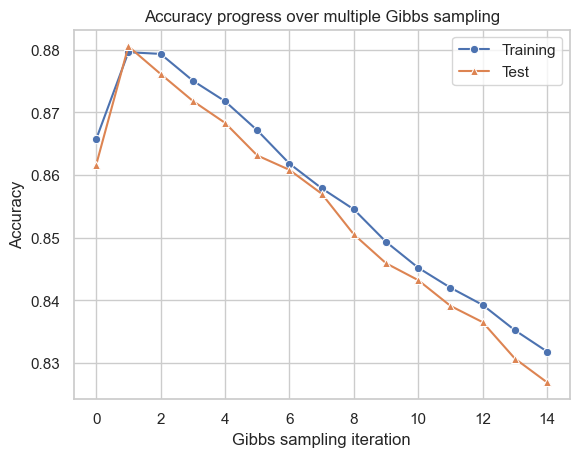

In [13]:
dbn.recognize(train_imgs, train_lbls)
plot_acc(dbn, train_lbls)
dbn.recognize(test_imgs, test_lbls)
plot_acc(dbn, test_lbls, train=False)
plt.savefig("../imgs/acc_prog.pdf", bbox_inches="tight")

In [6]:
steps = 2

dbn.recognize(train_imgs, train_lbls, steps)
dbn.recognize(test_imgs, test_lbls, steps)

accuracy = 88.21%
accuracy = 88.17%
